## Imports

In [1]:
from strava_helper import StravaAPI

## Code

### Authorization

In [3]:
# Create StravaAPI object
st = StravaAPI(30297538)
st.authorize('activity')
st.authorize('profile')

Connected successfully to db_strava
Siga o link para autorizar e anote o código: 
 https://www.strava.com/oauth/authorize?response_type=code&client_id=114849&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=activity%3Aread_all&approval_prompt=auto


Siga o link para autorizar e anote o código: 
 https://www.strava.com/oauth/authorize?response_type=code&client_id=114849&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile%3Aread_all&approval_prompt=auto


<Response [200]>

### Get athlete data

In [4]:
# GET request to Strava API
url = 'https://www.strava.com/api/v3/athlete'
url_type = 'profile'
athlete = st.get_data(url, url_type)
athlete

{'id': 30297538,
 'username': 'matheus_orsi',
 'resource_state': 3,
 'firstname': 'Matheus',
 'lastname': 'Orsi',
 'bio': '@matheus.orsi',
 'city': 'Campinas',
 'state': 'São Paulo',
 'country': 'Brazil',
 'sex': 'M',
 'premium': True,
 'summit': True,
 'created_at': '2018-04-29T21:37:16Z',
 'updated_at': '2023-11-08T09:37:56Z',
 'badge_type_id': 1,
 'weight': 76.0,
 'profile_medium': 'https://graph.facebook.com/1682174085195768/picture?height=256&width=256',
 'profile': 'https://graph.facebook.com/1682174085195768/picture?height=256&width=256',
 'friend': None,
 'follower': None,
 'blocked': False,
 'can_follow': True,
 'follower_count': 21,
 'friend_count': 20,
 'mutual_friend_count': 0,
 'athlete_type': 0,
 'date_preference': '%m/%d/%Y',
 'measurement_preference': 'meters',
 'clubs': [{'id': 231407,
   'resource_state': 2,
   'name': 'The Strava Club',
   'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/231407/5319085/1/medium.jpg',
   'profile': 'https://dgaly

### Get Zones

In [ ]:
url = 'https://www.strava.com/api/v3/athlete/zones'
url_type = 'profile'
zones = st.get_data(url, url_type)
zones

### Get Athlete Stats

In [6]:
# Get athlete id and pull stats
athlete_id = athlete['id']
url = f'https://www.strava.com/api/v3/athletes/{athlete_id}/stats'
url_type = 'profile'
stats = st.get_data(url, url_type)
stats

{'biggest_ride_distance': 76708.5,
 'biggest_climb_elevation_gain': 34.80000000000007,
 'recent_ride_totals': {'count': 13,
  'distance': 526362.68359375,
  'moving_time': 85201,
  'elapsed_time': 92279,
  'elevation_gain': 6870.19482421875,
  'achievement_count': 332},
 'all_ride_totals': {'count': 221,
  'distance': 4361361,
  'moving_time': 728375,
  'elapsed_time': 821299,
  'elevation_gain': 61986},
 'recent_run_totals': {'count': 0,
  'distance': 0.0,
  'moving_time': 0,
  'elapsed_time': 0,
  'elevation_gain': 0.0,
  'achievement_count': 0},
 'all_run_totals': {'count': 5,
  'distance': 38993,
  'moving_time': 16997,
  'elapsed_time': 28539,
  'elevation_gain': 324},
 'recent_swim_totals': {'count': 0,
  'distance': 0.0,
  'moving_time': 0,
  'elapsed_time': 0,
  'elevation_gain': 0.0,
  'achievement_count': 0},
 'all_swim_totals': {'count': 0,
  'distance': 0,
  'moving_time': 0,
  'elapsed_time': 0,
  'elevation_gain': 0},
 'ytd_ride_totals': {'count': 47,
  'distance': 153655

In [26]:
# Get athlete activities
all_activities = []
page = 1
while True:
    url = f'https://www.strava.com/api/v3/athlete/activities?per_page=200&page={page}'
    url_type = 'activity'
    activities = st.get_data(url, url_type)
    all_activities.extend(activities)
    print(f'Page {page} done')
    page += 1
    if len(activities) < 200:
        break

# url = f'https://www.strava.com/api/v3/athlete/activities?per_page=200'
# url_type = 'activity'
# activities = st.get_data(url, url_type)
# activites

Page 2 done
Page 3 done


In [28]:
filtered_activities = list(filter(lambda x: x['type'] == 'Ride', all_activities))

In [29]:
filtered_activities

[{'resource_state': 2,
  'athlete': {'id': 30297538, 'resource_state': 1},
  'name': 'Pedalada matinal',
  'distance': 46447.0,
  'moving_time': 7100,
  'elapsed_time': 7921,
  'total_elevation_gain': 643.3,
  'type': 'Ride',
  'sport_type': 'Ride',
  'workout_type': None,
  'id': 10206618855,
  'start_date': '2023-11-12T12:53:01Z',
  'start_date_local': '2023-11-12T09:53:01Z',
  'timezone': '(GMT-03:00) America/Sao_Paulo',
  'utc_offset': -10800.0,
  'location_city': None,
  'location_state': None,
  'location_country': 'Brazil',
  'achievement_count': 8,
  'kudos_count': 1,
  'comment_count': 0,
  'athlete_count': 2,
  'photo_count': 0,
  'map': {'id': 'a10206618855',
   'summary_polyline': 'tk{jClhe~GzD}FQNeEgE{BwD_DqH}BuBcEeAaEcBuHy@oDiAyDaEkCyH}@m@aBMaKRaC`A_CfBqAbBgCpAkHt@uIYuGfC{Cj@kENoMyBiYt@iCUaD_AgRaMuNmCwAyAqCyFcAk@aAIgNbBaExCyHg@aCX{ExBwFhJmCqBsAiC{AsQa@iCU[Ob@fAfGh@dIJbCM|AfA|DHbEf@fAjChVjBrLdDpXVvEh@PK@Jh@hCzG`CpInCpF@z@]^uAEkSmN_CeAkBA}Al@_EpGu@h@cAQiC}CSiADaAzGmTn@wDVsE

In [30]:
import pandas as pd

df = pd.DataFrame(filtered_activities)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resource_state                 226 non-null    int64  
 1   athlete                        226 non-null    object 
 2   name                           226 non-null    object 
 3   distance                       226 non-null    float64
 4   moving_time                    226 non-null    int64  
 5   elapsed_time                   226 non-null    int64  
 6   total_elevation_gain           226 non-null    float64
 7   type                           226 non-null    object 
 8   sport_type                     226 non-null    object 
 9   workout_type                   206 non-null    float64
 10  id                             226 non-null    int64  
 11  start_date                     226 non-null    object 
 12  start_date_local               226 non-null    obj

In [ ]:
df.head()

In [48]:
analysis = df[[
    'distance',
    'moving_time',
    'elapsed_time',
    'total_elevation_gain',
    'start_date',
    'achievement_count',
    'average_speed',
    'max_speed',
    'pr_count',
    'elev_high',
    'elev_low']].copy()

# convert start_date and start_date_local to datetime and set format as YYYY-MM-DD HH:MM:SS
analysis['start_date'] = pd.to_datetime(analysis['start_date'])
analysis['start_date'] = analysis['start_date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# convert moving_time and elapsed_time to minutes
analysis['moving_time'] = analysis['moving_time'] / 60
analysis['elapsed_time'] = analysis['elapsed_time'] / 60

# convert average_speed and max_speed to km/h
analysis['average_speed'] = analysis['average_speed'] * 3.6
analysis['max_speed'] = analysis['max_speed'] * 3.6
analysis['distance'] = analysis['distance'] / 1000

analysis = analysis.sort_values(by='start_date', ascending=True)

analysis

,distance,moving_time,elapsed_time,total_elevation_gain,start_date,achievement_count,average_speed,max_speed,pr_count,elev_high,elev_low
225,14.0943,50.200000,50.333333,232.3,2018-04-29 21:41:47,15,16.8444,49.3200,5,746.9,699.0
224,7.8582,22.516667,22.516667,68.5,2018-05-02 17:43:10,0,20.9412,39.6000,0,382.4,341.1
223,13.9212,40.716667,41.350000,156.6,2018-05-09 20:23:30,1,20.5128,42.1200,0,382.4,340.9
222,20.5569,56.333333,56.333333,227.9,2018-05-11 17:27:02,5,21.8952,45.7200,3,391.3,340.9
221,9.8647,26.466667,26.466667,74.3,2018-05-17 19:00:06,2,22.3632,45.7200,1,382.4,341.0
...,...,...,...,...,...,...,...,...,...,...,...
4,59.9942,147.000000,164.683333,823.5,2023-11-05 12:21:13,46,24.4872,65.6964,15,733.6,582.0
3,26.0850,60.650000,60.650000,267.4,2023-11-08 08:36:58,13,25.8048,69.5088,4,733.6,635.3
2,25.9528,59.000000,59.983333,269.6,2023-11-08 08:37:15,17,26.3916,74.6532,8,733.6,635.3
1,46.6659,120.366667,132.216667,656.6,2023-11-12 12:52:58,5,23.2632,60.0696,3,733.6,587.4


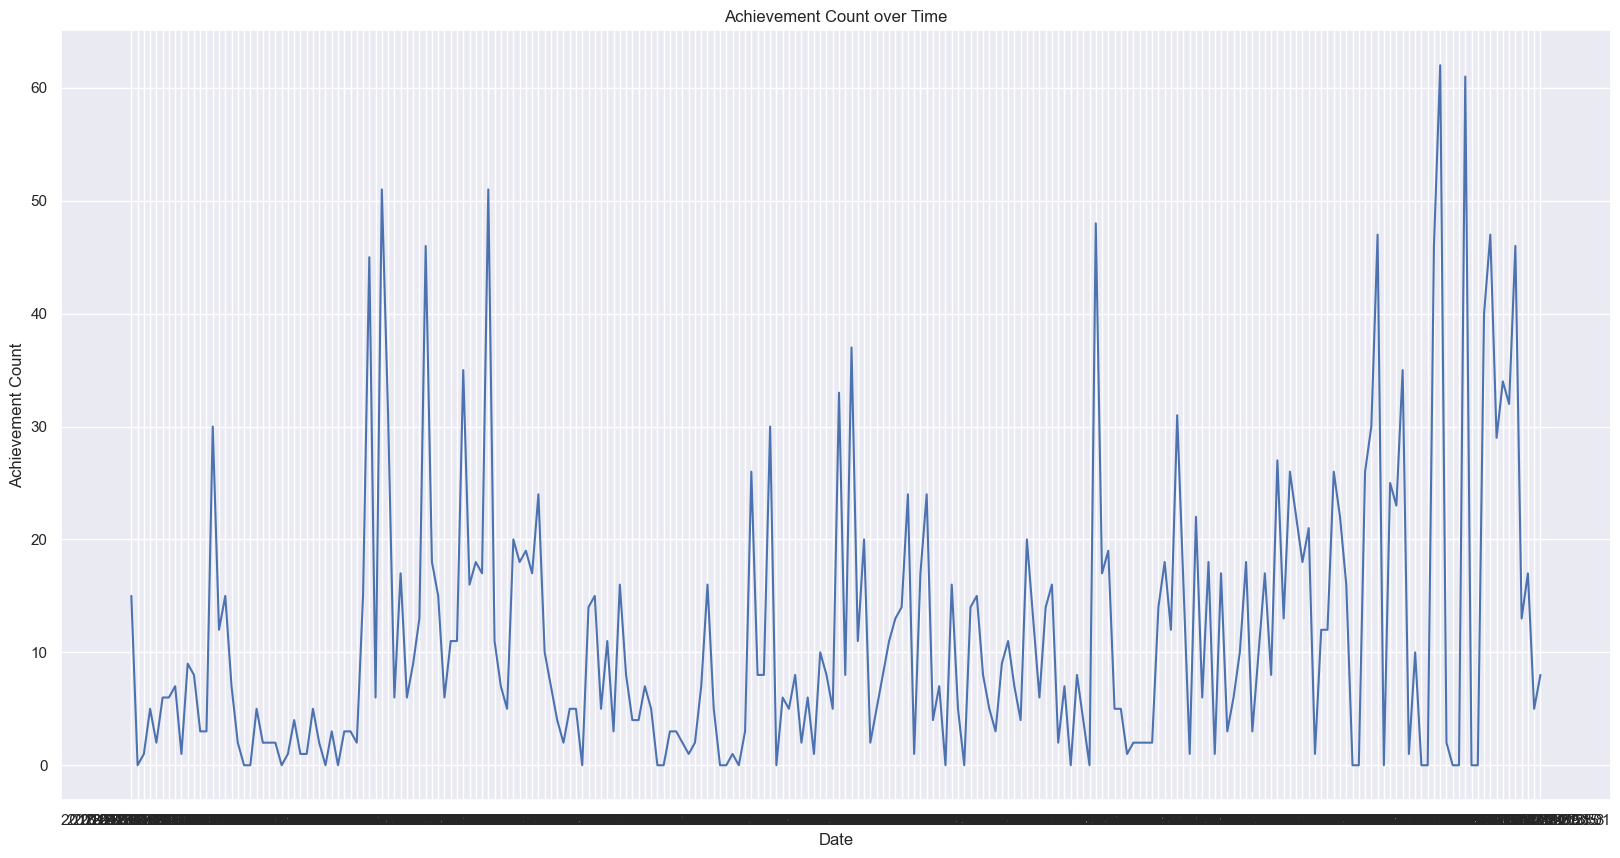

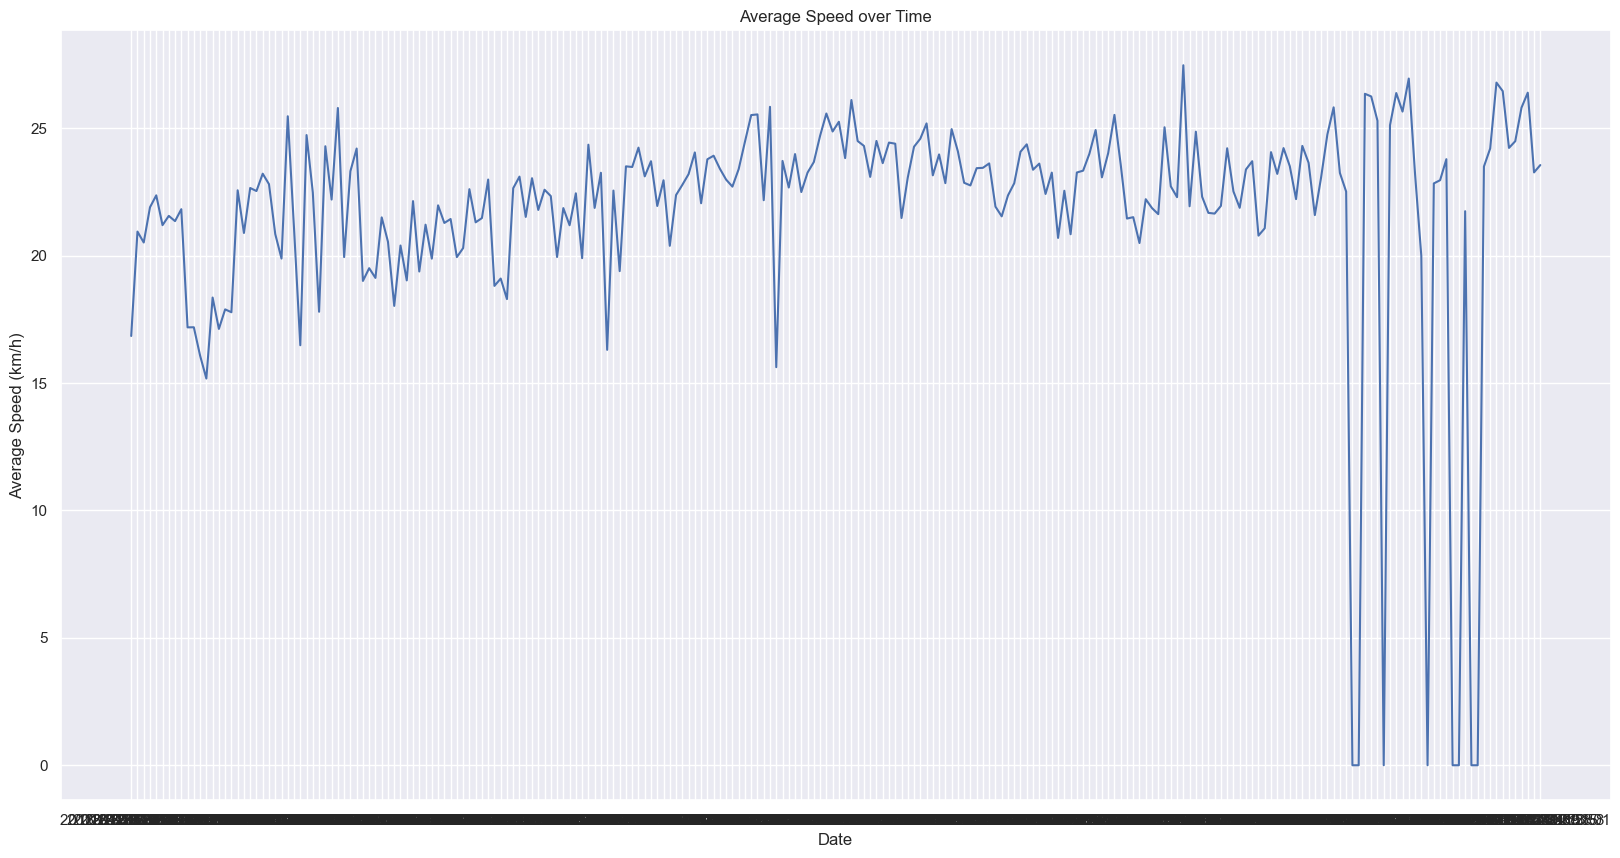

In [49]:
# plot achievement_count over start_date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(20, 10))
plt.plot(analysis['start_date'], analysis['achievement_count'])
plt.xlabel('Date')
plt.ylabel('Achievement Count')
plt.title('Achievement Count over Time')
plt.show()

# plot average_speed over start_date
plt.figure(figsize=(20, 10))
plt.plot(analysis['start_date'], analysis['average_speed'])
plt.xlabel('Date')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Speed over Time')
plt.show()


## RASCUNHO

### Authentication